In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def Lanczos(A,v,m=10):
    # initialize beta and v
    beta = 0
    v_pre = np.zeros_like(v)
    # normalize v
    v = v / np.linalg.norm(v)
    # Use V to store the Lanczos vectors
    V = np.zeros((len(v),m))
    V[:,0] = v
    # Use alphas, betas to store the Lanczos parameters
    alphas = np.zeros(m)
    betas = np.zeros(m-1)
    for j in range(m-1):
        w = np.dot(A,v) - beta * v_pre
        alpha = np.dot(v,w)
        alphas[j] = alpha
        w = w - alpha * v
        beta = np.linalg.norm(w)
        if np.abs(beta) < 1e-6:
            break
        betas[j] = beta
        v_pre = v
        v = w / beta
        V[:,j+1] = v
        
    if m > 1 and j < m-2:
        V = V[:,:j+1]
        alphas = alphas[:j+1]
        betas = betas[:j]
    alphas[-1] = np.dot(v, np.dot(A,v))
    
    return V, alphas, betas, beta

[0.88054455 1.13170554 1.50806688 1.82717427 2.20440044 2.84887159
 3.2509706  4.39222874 4.42966835 5.04140644 5.38704204 5.46182145
 5.84901283 6.13377214 6.97331422 7.61860502 8.51386696 8.59610398
 8.96526511 9.4341586 ]
[[4.50649749 0.         0.         ... 0.         0.         0.        ]
 [0.         7.71555943 0.         ... 0.         0.         0.        ]
 [0.         0.         1.96832704 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.62752233 0.         0.        ]
 [0.         0.         0.         ... 0.         0.25116099 0.        ]
 [0.         0.         0.         ... 0.         0.         6.09276967]]
[2.50972694 2.4922633  2.01181399 2.10069348 2.20068412 2.53378
 1.87539819 1.88162576 2.62720754 1.5543619  2.22330959 1.52010551
 1.72875403 1.05498652 2.08291096 1.6719282  0.56924169 0.42045964
 0.28503425 0.        ]
[3.93450772 4.3622464  4.2759695  4.22758329 4.26433516 4.47054721
 4.36070442 4.0733118  4.14700893 3.834318

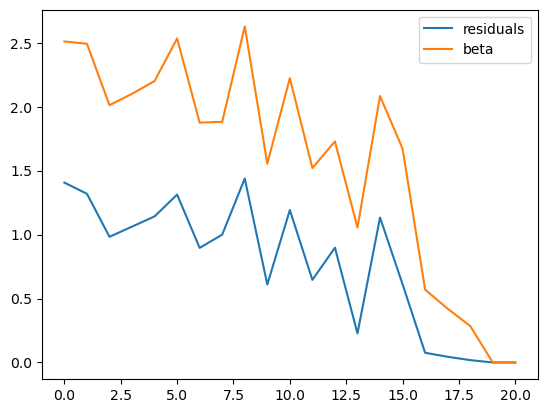

In [41]:
# generate matrix A
import numpy as np
rng = np.random.default_rng(2023)

n = 100; m = 21
L1 = 10
n_eig = 20
lambdas = rng.uniform(0, L1, n_eig)
# generate a random vector v, where each entry is randomly chosen from lambdas
diags = np.array([lambdas[i] for i in rng.choice(n_eig, size = n)]) - np.min(lambdas)

print(np.sort(lambdas))
A = np.diag(diags)
v = rng.standard_normal(size = n)

V, alphas, betas, beta = Lanczos(A, v, m = m)

T = np.diag(alphas) + np.diag(betas, -1) + np.diag(betas, 1)

print(A)
print(betas)
print(alphas)
# eigvals =np.linalg.eigvalsh(m_residual)
# print(eigvals)
# print(V.T @ V)

residuals = np.zeros(len(alphas))
for i in range(len(alphas)): 
    m_residual = V[:,:i+1] @ T[:i+1,:i+1] @ V[:,:i+1].T - A
    eigvals =np.linalg.eigvalsh(m_residual)
    residuals[i] = np.max(eigvals)

plt.figure()
plt.plot(residuals, label = 'residuals')
plt.plot(np.append(betas,beta), label = 'beta')
plt.legend()
plt.show()

# m_residual = V @ T @ V.T - A
# eigvals =np.linalg.eigvalsh(m_residual)
# print(np.max(eigvals))
